In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', 32)


In [3]:
thyroid_data = pd.read_csv("thyroidDF.csv")
print(thyroid_data.shape)
thyroid_data.head()

(9172, 31)


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
data = thyroid_data.copy()

In [5]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [6]:
data.dtypes.value_counts()

object     23
float64     6
int64       2
Name: count, dtype: int64

In [7]:
data.isna().sum()/len(data) * 100

age                     0.000000
sex                     3.347143
on_thyroxine            0.000000
query_on_thyroxine      0.000000
on_antithyroid_meds     0.000000
sick                    0.000000
pregnant                0.000000
thyroid_surgery         0.000000
I131_treatment          0.000000
query_hypothyroid       0.000000
query_hyperthyroid      0.000000
lithium                 0.000000
goitre                  0.000000
tumor                   0.000000
hypopituitary           0.000000
psych                   0.000000
TSH_measured            0.000000
TSH                     9.180113
T3_measured             0.000000
T3                     28.390754
TT4_measured            0.000000
TT4                     4.819014
T4U_measured            0.000000
T4U                     8.820323
FTI_measured            0.000000
FTI                     8.744003
TBG_measured            0.000000
TBG                    96.194941
referral_source         0.000000
target                  0.000000
patient_id

<Axes: ylabel='count'>

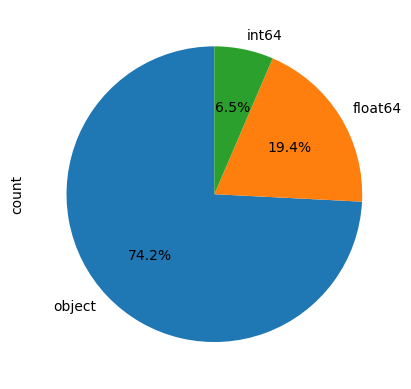

In [8]:
data.dtypes.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

<Axes: >

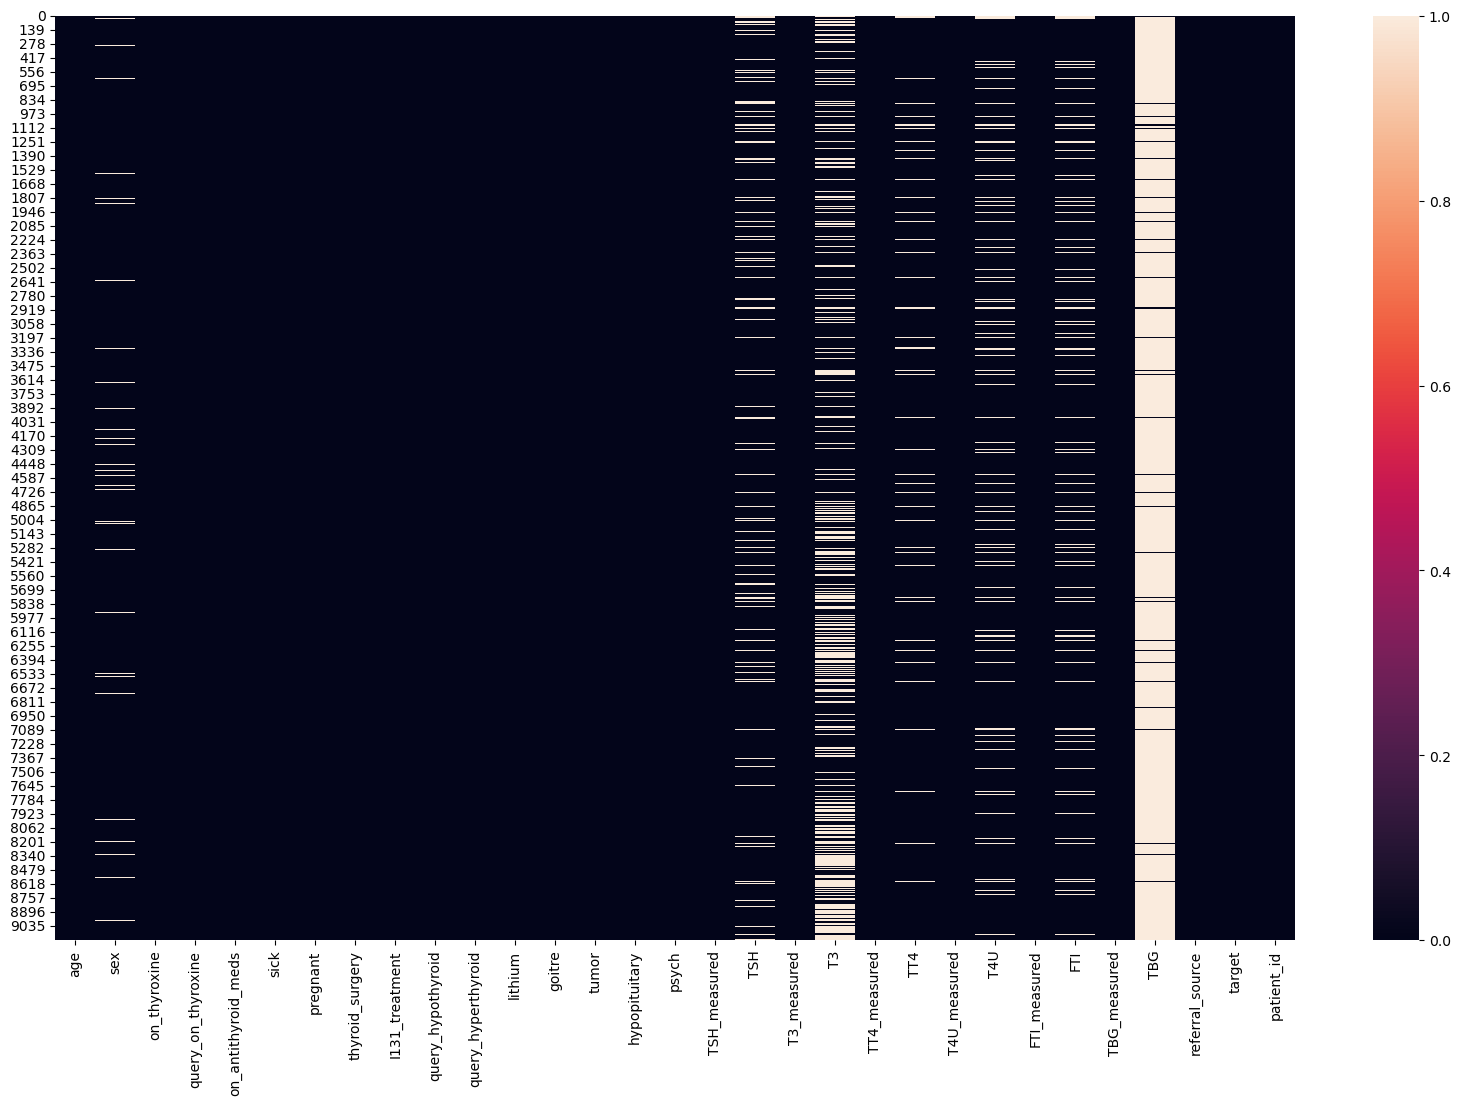

In [9]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.isna())

In [10]:
missing_rate = data.isna().sum()/len(data) *100
missing_rate.sort_values(ascending=False)

TBG                    96.194941
T3                     28.390754
TSH                     9.180113
T4U                     8.820323
FTI                     8.744003
TT4                     4.819014
sex                     3.347143
age                     0.000000
TSH_measured            0.000000
target                  0.000000
referral_source         0.000000
TBG_measured            0.000000
FTI_measured            0.000000
T4U_measured            0.000000
TT4_measured            0.000000
T3_measured             0.000000
psych                   0.000000
hypopituitary           0.000000
tumor                   0.000000
goitre                  0.000000
lithium                 0.000000
query_hyperthyroid      0.000000
query_hypothyroid       0.000000
I131_treatment          0.000000
thyroid_surgery         0.000000
pregnant                0.000000
sick                    0.000000
on_antithyroid_meds     0.000000
query_on_thyroxine      0.000000
on_thyroxine            0.000000
patient_id

In [11]:
#Dropped the TBG feature due to extreme sparsity (96.2% missing), as imputation would introduce significant noise and undermine model reliability

df = data.drop(columns=['TBG'])

missing = df.isnull().sum()/len(df) * 100
missing.sort_values(ascending=False)

T3                     28.390754
TSH                     9.180113
T4U                     8.820323
FTI                     8.744003
TT4                     4.819014
sex                     3.347143
age                     0.000000
target                  0.000000
referral_source         0.000000
TBG_measured            0.000000
FTI_measured            0.000000
T4U_measured            0.000000
TT4_measured            0.000000
T3_measured             0.000000
TSH_measured            0.000000
psych                   0.000000
hypopituitary           0.000000
tumor                   0.000000
goitre                  0.000000
lithium                 0.000000
query_hyperthyroid      0.000000
query_hypothyroid       0.000000
I131_treatment          0.000000
thyroid_surgery         0.000000
pregnant                0.000000
sick                    0.000000
on_antithyroid_meds     0.000000
query_on_thyroxine      0.000000
on_thyroxine            0.000000
patient_id              0.000000
dtype: flo

In [12]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,f,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,t,64.0,t,0.83,t,77.0,f,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,91.0,t,0.92,t,99.0,f,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,113.0,t,1.27,t,89.0,f,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,75.0,t,0.85,t,88.0,f,other,-,870119027


In [13]:
X = df.drop(columns=['patient_id', 'target'])

y = df['target']

In [14]:
y.unique()

#"-", means normal, and anything else is abnormal. We will convert this to a binary target where 0 represents normal and 1 represents abnormal.

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [15]:
y_n = df['target'].apply(lambda x: 0 if x == '-' else 1)

print("Répartition après transformation :")
print(y_n.value_counts())
print()
print("0 (normal) : ", y_n.value_counts()[0])
print("1 (abnormal) : ", y_n.value_counts()[1])

Répartition après transformation :
target
0    6771
1    2401
Name: count, dtype: int64

0 (normal) :  6771
1 (abnormal) :  2401


In [16]:
X_num = X.select_dtypes(include=['float64', 'int64'])
X_cat = X.select_dtypes(include=['object'])

In [17]:
X_num

,age,TSH,T3,TT4,T4U,FTI
0,29,0.3,NaN,NaN,NaN,NaN
1,29,1.6,1.9,128.0,NaN,NaN
2,41,NaN,NaN,NaN,NaN,NaN
3,36,NaN,NaN,NaN,NaN,NaN
4,32,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
9167,56,NaN,NaN,64.0,0.83,77.0
9168,22,NaN,NaN,91.0,0.92,99.0
9169,69,NaN,NaN,113.0,1.27,89.0
9170,47,NaN,NaN,75.0,0.85,88.0


In [18]:
X_cat

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source
0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,f,f,f,f,f,other
1,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,f,f,other
2,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,f,f,f,t,other
3,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,other
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,t,f,SVI
9168,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,SVI
9169,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,SVI
9170,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,t,f,other


In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordinale = OrdinalEncoder()

X_cat_encoded = pd.DataFrame(ordinale.fit_transform(X_cat), columns=X_cat.columns)

Text(0.5, 1.0, 'Correlation between our categorical variables')

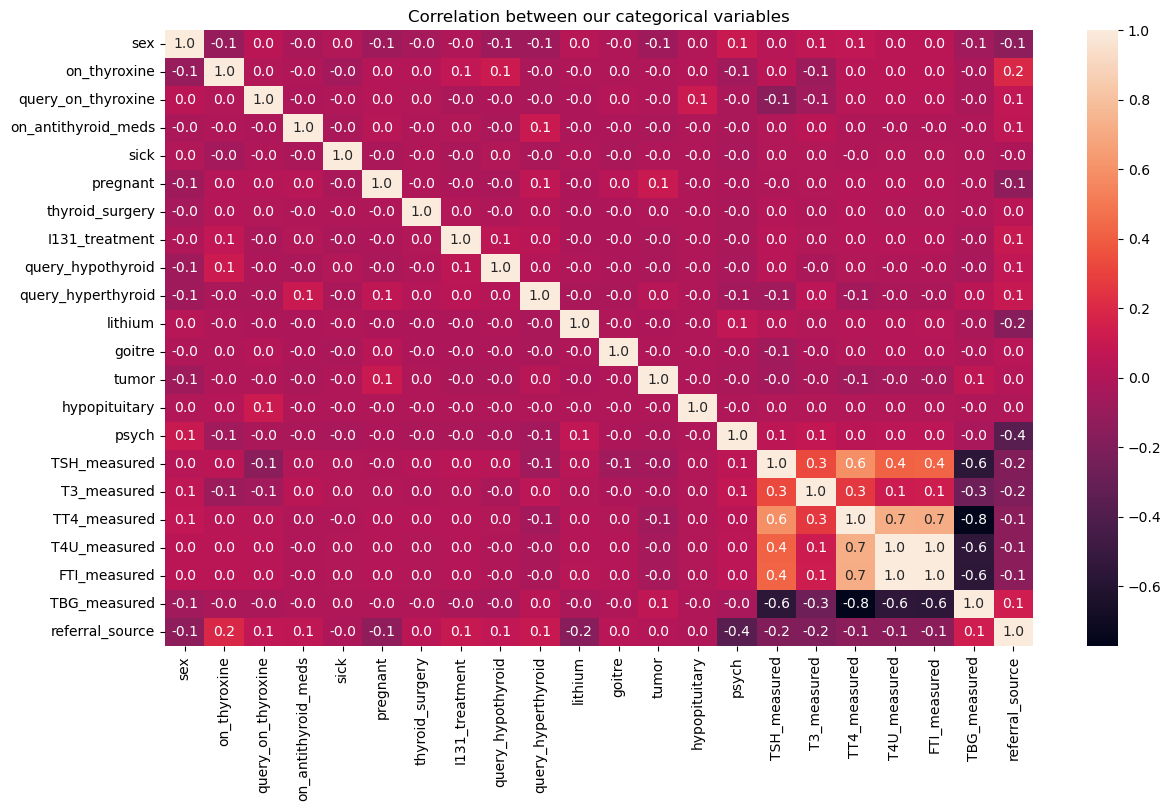

In [20]:
plt.figure(figsize = (14,8))
sns.heatmap(X_cat_encoded.corr(),annot=True,fmt='.1f')
plt.title("Correlation between our categorical variables")

Text(0.5, 1.0, 'Correlation between our numerical variables')

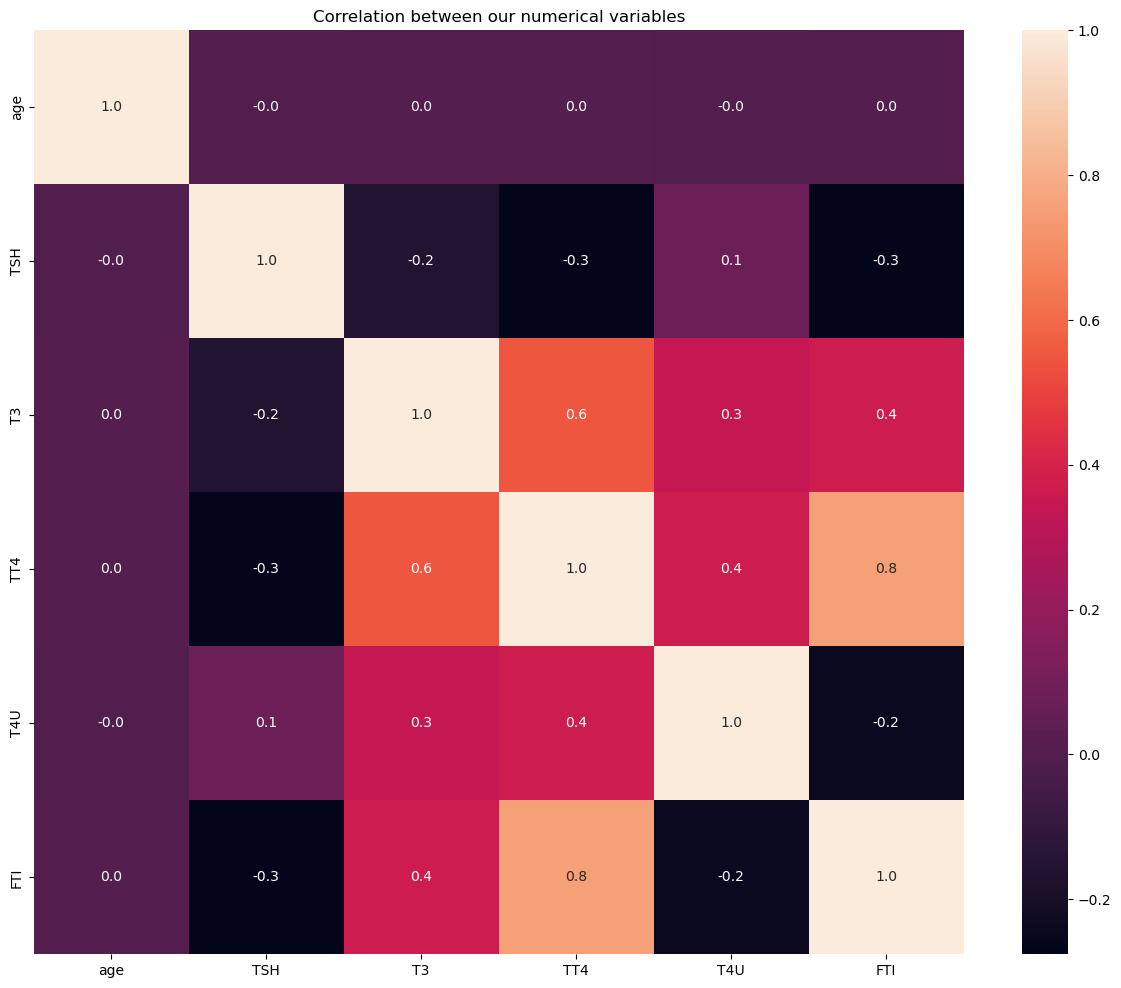

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(X_num.corr(), annot=True, fmt='.1f')
plt.title("Correlation between our numerical variables")

<Axes: >

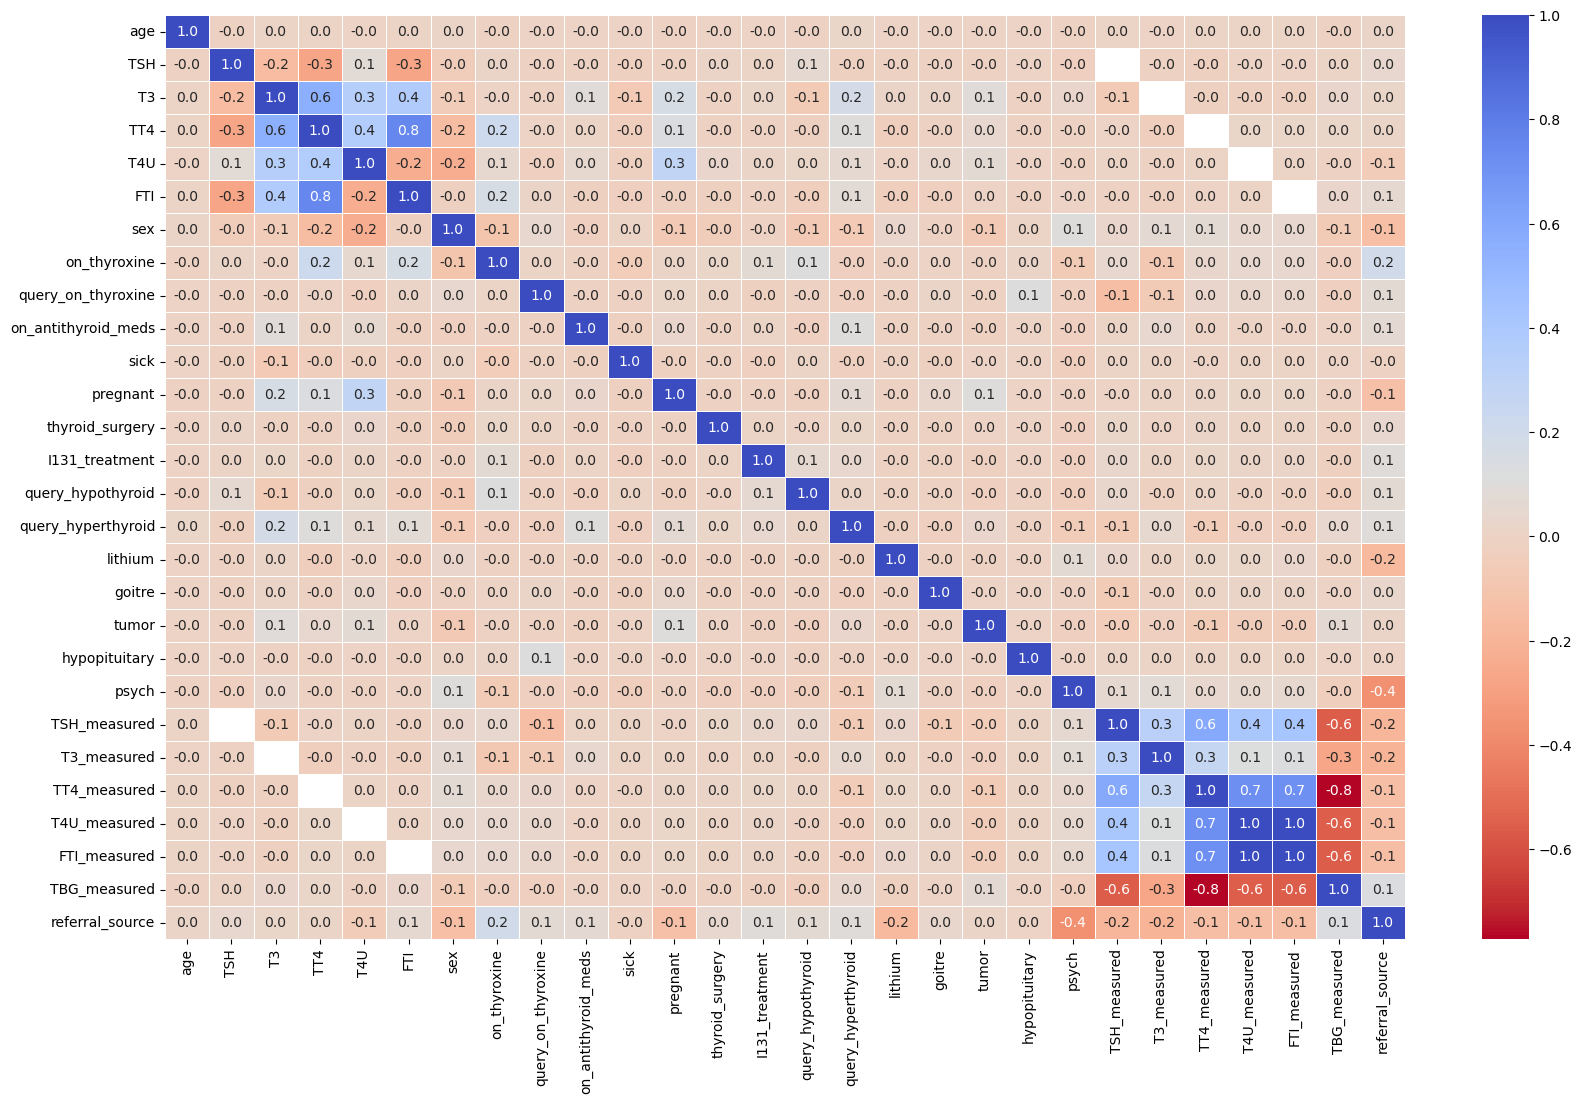

In [22]:
X_entire = pd.concat([X_num, X_cat_encoded], axis=1)

plt.figure(figsize=(20, 12))
sns.heatmap(X_entire.corr(), annot=True, cmap='coolwarm_r', fmt=".1f", linewidths=0.5)

<Axes: title={'center': 'Correlation Heatmap of our variables'}>

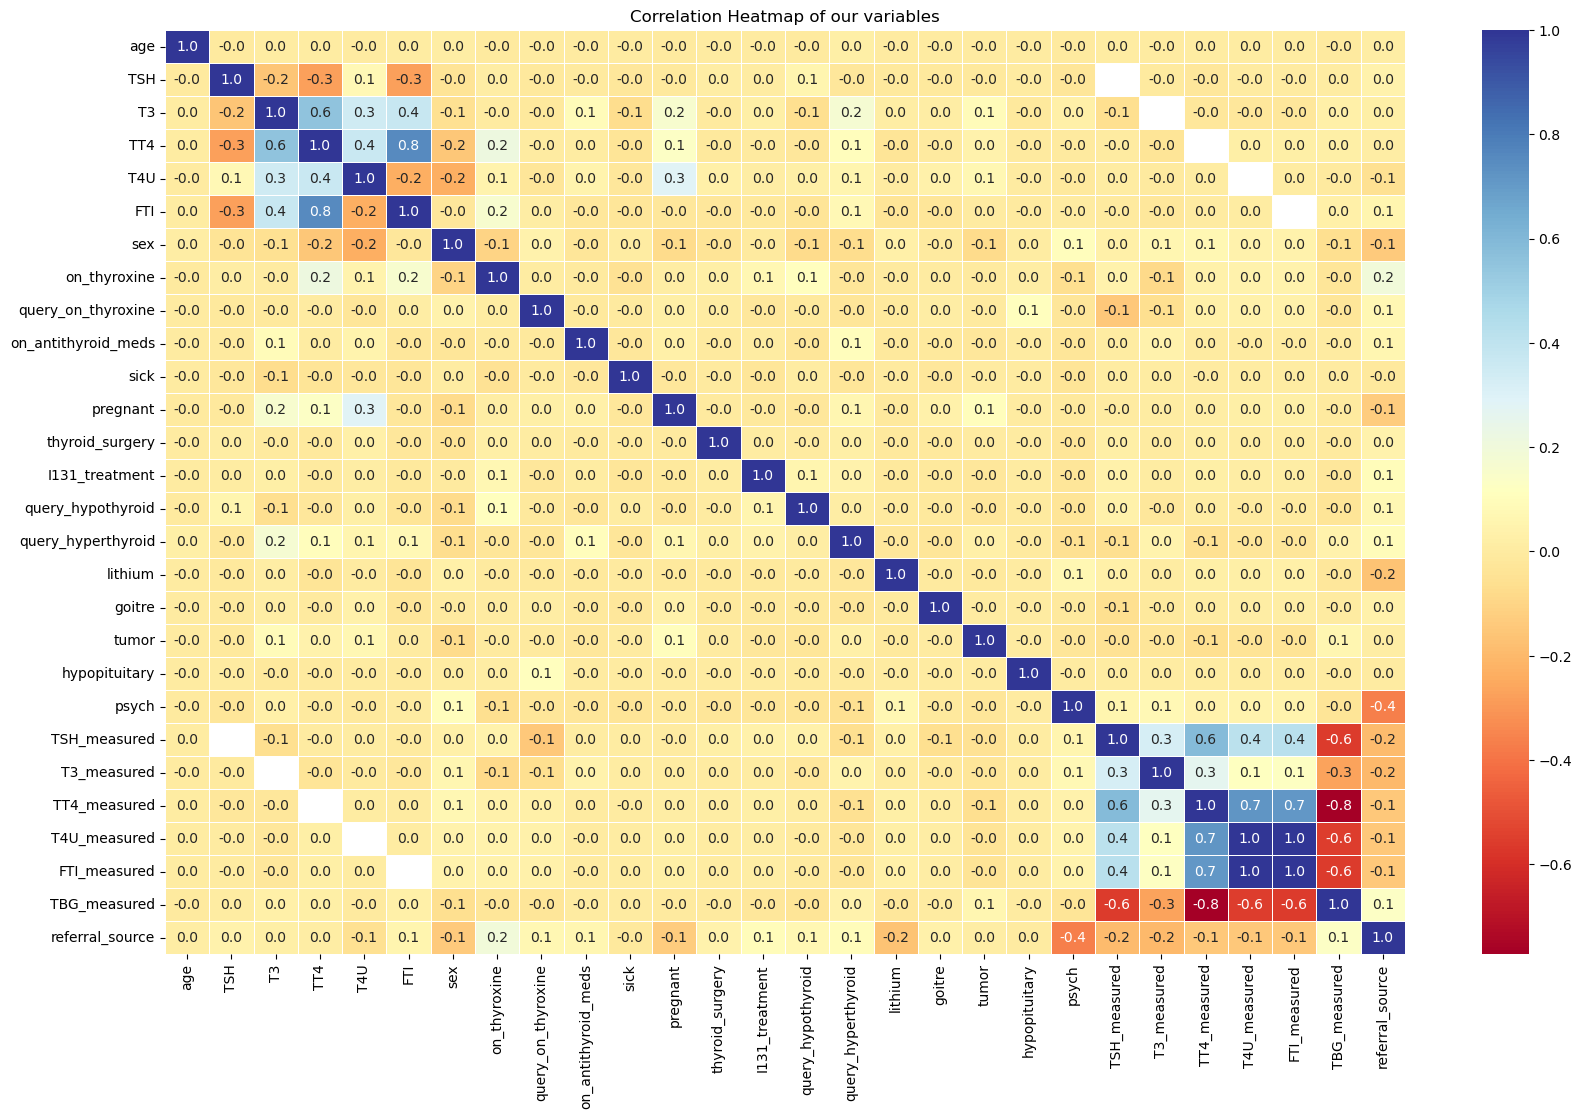

In [23]:
X_entire = pd.concat([X_num, X_cat_encoded], axis=1)

plt.figure(figsize=(20, 12))
plt.title("Correlation Heatmap of our variables")
sns.heatmap(X_entire.corr(), annot=True, cmap='RdYlBu', fmt=".1f", linewidths=0.5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9472\1264335225.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_n, data=df, palette='Set2')


<Axes: xlabel='target', ylabel='count'>

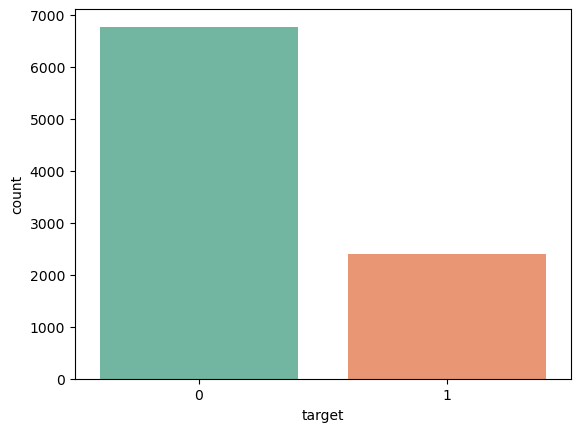

In [24]:
sns.countplot(x=y_n, data=df, palette='Set2')

In [25]:
correlation = X_entire.join(y_n).corr()['target'].drop('target')
correlation = correlation.sort_values(ascending=False)

correlation

TSH                    0.239698
TT4                    0.122055
pregnant               0.113155
FTI                    0.108205
T4U                    0.095178
on_thyroxine           0.070647
TSH_measured           0.057905
query_hypothyroid      0.054994
T3_measured            0.047669
query_hyperthyroid     0.038232
T4U_measured           0.025166
hypopituitary          0.024801
tumor                  0.024673
FTI_measured           0.024534
TT4_measured           0.021661
on_antithyroid_meds    0.010285
TBG_measured           0.008608
I131_treatment         0.005090
referral_source        0.001271
query_on_thyroxine    -0.000100
thyroid_surgery       -0.006362
age                   -0.010348
sick                  -0.010509
lithium               -0.028086
goitre                -0.031214
T3                    -0.035077
psych                 -0.071853
sex                   -0.088718
Name: target, dtype: float64

Text(0, 0.5, 'Features')

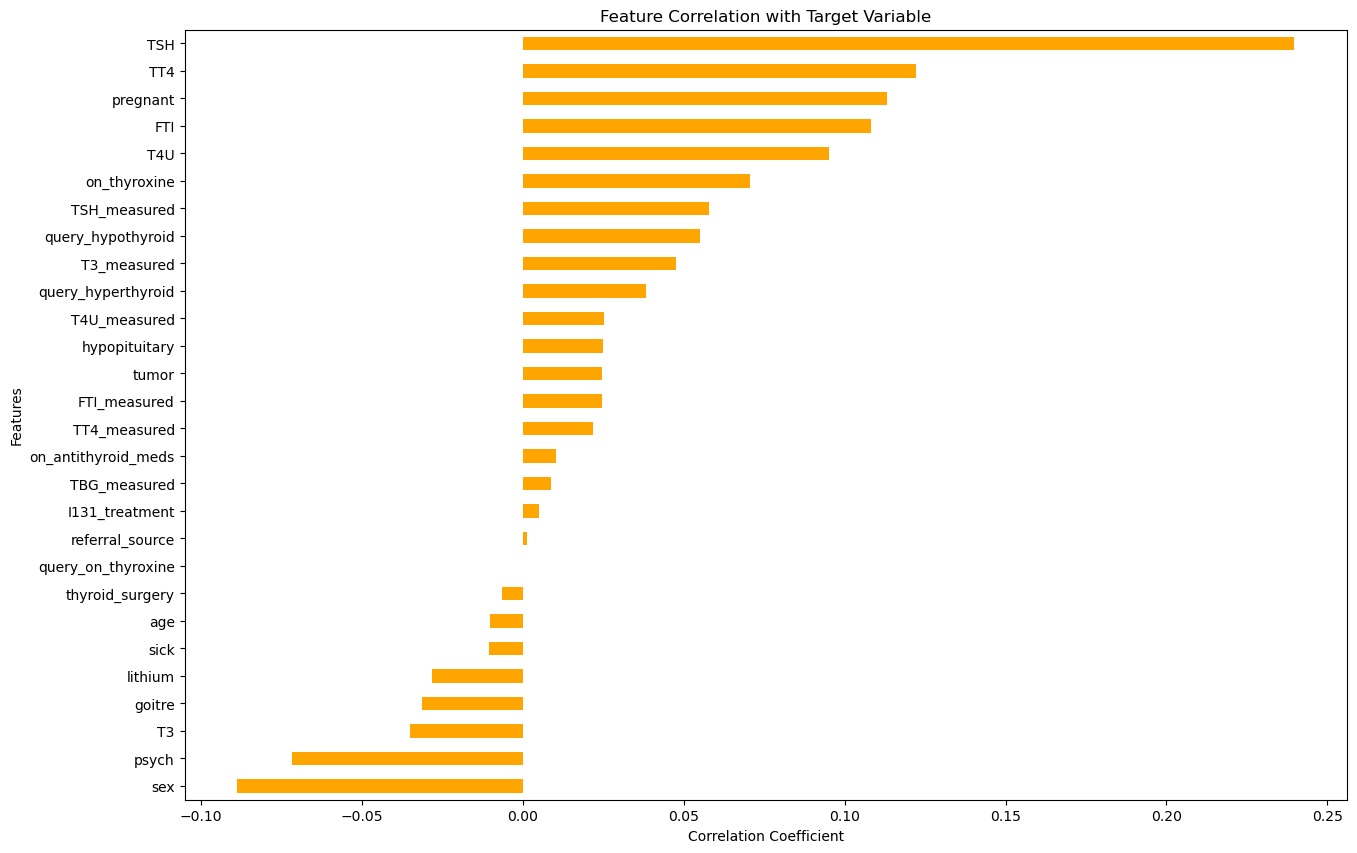

In [26]:
correlation.sort_values().plot(kind='barh', figsize=(15, 10), color='orange')
plt.title("Feature Correlation with Target Variable")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")

<Axes: >

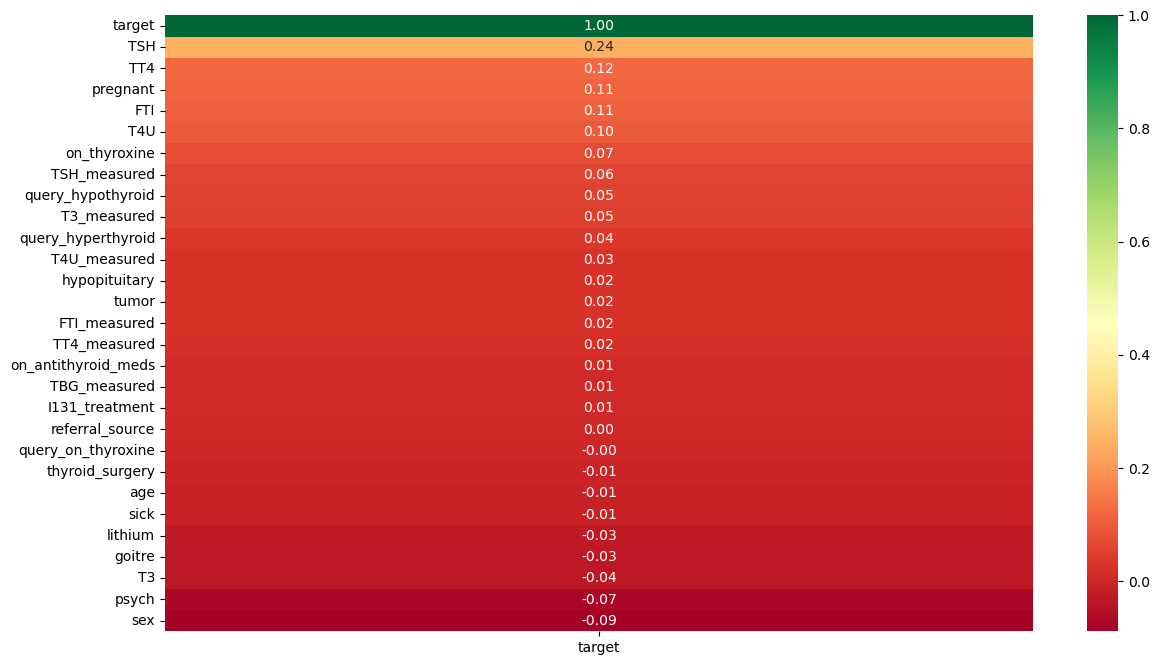

In [27]:
df_final = pd.concat([X_entire, y_n], axis=1)

corr_ = df_final.corr()[['target']].sort_values(by='target', ascending=False)

plt.figure(figsize=(14, 8))
sns.heatmap(corr_, annot=True,cmap ='RdYlGn', fmt=".2f")

In [28]:
X_entire

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source
0,29,0.3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,29,1.6,1.9,128.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
2,41,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
3,36,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
4,32,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,NaN,NaN,64.0,0.83,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0
9168,22,NaN,NaN,91.0,0.92,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0
9169,69,NaN,NaN,113.0,1.27,89.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0
9170,47,NaN,NaN,75.0,0.85,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0


In [29]:
X.shape

(9172, 28)

In [30]:
#1. On récupère les corrélations avec la cible en valeur absolue 

corr_series = df_final.corr()['target'].drop('target').abs().sort_values(ascending=False)

print("Classement des variables les plus utiles  ")
print()

for i, (col, val) in enumerate(corr_series.items(), 1):

    signe = "+" if df_final.corr().loc[col, 'target'] > 0 else "-"
    
    print(f"{i}e : {col:<15}  {val:.2f} ({signe})")

Classement des variables les plus utiles  

1e : TSH              0.24 (+)
2e : TT4              0.12 (+)
3e : pregnant         0.11 (+)
4e : FTI              0.11 (+)
5e : T4U              0.10 (+)
6e : sex              0.09 (-)
7e : psych            0.07 (-)
8e : on_thyroxine     0.07 (+)
9e : TSH_measured     0.06 (+)
10e : query_hypothyroid  0.05 (+)
11e : T3_measured      0.05 (+)
12e : query_hyperthyroid  0.04 (+)
13e : T3               0.04 (-)
14e : goitre           0.03 (-)
15e : lithium          0.03 (-)
16e : T4U_measured     0.03 (+)
17e : hypopituitary    0.02 (+)
18e : tumor            0.02 (+)
19e : FTI_measured     0.02 (+)
20e : TT4_measured     0.02 (+)
21e : sick             0.01 (-)
22e : age              0.01 (-)
23e : on_antithyroid_meds  0.01 (+)
24e : TBG_measured     0.01 (+)
25e : thyroid_surgery  0.01 (-)
26e : I131_treatment   0.01 (+)
27e : referral_source  0.00 (+)
28e : query_on_thyroxine  0.00 (-)


In [31]:
abnormal = round(df['target'].value_counts()[1] / len(df) * 100, 2) 
print(f"Percentage of abnormal cases: {abnormal}%")

Percentage of abnormal cases: 4.75%


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9472\889524691.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abnormal = round(df['target'].value_counts()[1] / len(df) * 100, 2)


In [32]:
X_s = X.drop(columns=['referral_source','query_on_thyroxine'])
X_s.shape

(9172, 26)

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import VarianceThreshold

In [34]:
numerical_features = make_column_selector(dtype_include=[np.number])
numerical_features = numerical_features(X_s)

non_numerical_features = make_column_selector(dtype_exclude=[np.number])
non_numerical_features = non_numerical_features(X_s)

In [35]:
print("Numerical features: ", numerical_features)
print("Non-numerical features: ", non_numerical_features)

Numerical features:  ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Non-numerical features:  ['sex', 'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']


In [36]:
numerical_pipeline = make_pipeline(KNNImputer(), RobustScaler(),
                                   PolynomialFeatures(degree=1),
                                   VarianceThreshold(threshold=0.01))

non_numerical_pipeline = make_pipeline(OneHotEncoder(sparse_output=False),KNNImputer(),
                                       PolynomialFeatures(degree=1),
                                       RobustScaler(),VarianceThreshold(threshold=0.01))

In [37]:
preprocessor = make_column_transformer( (numerical_pipeline, numerical_features),
    (non_numerical_pipeline, non_numerical_features))

In [38]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('pipeline-1', ...), ('pipeline-2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_

In [39]:
from sklearn.ensemble import IsolationForest

contaminations = [0.1,0.2, 0.3, 0.4, 0.5]

for i in contaminations:
    
    outliers_detector = IsolationForest(contamination=i, random_state=42)

model = make_pipeline(preprocessor, outliers_detector)
model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('isolationforest', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('pipeline-1', ...), ('pipeline-2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of 

In [40]:
from sklearn.metrics import f1_score

outliers = model.fit(X_s) 

best = {"cont": None, "f1": -1}
predictions = model.predict(X_s)
y_pred = np.where(predictions == -1, 1, 0)

scor = f1_score(y_n, y_pred)
    
print(f"contamination={i} -> F1={scor:.4f}")

if scor > best["f1"]:
    
    best["f1"] = scor
    best["cont"] = i

print("\nBest contamination:", best["cont"], "with F1:", best["f1"])


contamination=0.5 -> F1=0.3939

Best contamination: 0.5 with F1: 0.39387433805639044


In [41]:
y_n.value_counts()

target
0    6771
1    2401
Name: count, dtype: int64

In [42]:
from sklearn.metrics import f1_score
import numpy as np

# 1. Force y_n en entiers (0 et 1)
y_true = y_n.astype(int).values

# 2. Convertis les prédictions (-1/1) en (1/0)
# Isolation Forest : -1 = anomalie, 1 = normal
raw_preds = model.predict(X_s)
y_pred = np.where(raw_preds == -1, 1, 0)

scor = f1_score(y_true, y_pred)

print(f"F1 Score : {scor:.4f}")

F1 Score : 0.3939


In [43]:
contaminations = [0.5]

for c in contaminations:
    outliers_detector = IsolationForest(contamination=c, random_state=42)
    model = make_pipeline(preprocessor, outliers_detector)
    model.fit(X_s)
    
    # Rappel : Isolation Forest renvoie -1 pour l'anomalie
    preds_bin = np.where(model.predict(X_s) == -1, 1, 0)
    
    scor = f1_score(y_n, preds_bin)
    print(f"Contamination {c*100:.2f}% -> F1-Score: {scor:.4f}")

Contamination 50.00% -> F1-Score: 0.3939


In [44]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_s, y_n, test_size=0.2, random_state=42)


In [48]:
X_train_lavé = preprocessor.fit_transform(X_train)
X_test_lavé = preprocessor.transform(X_test)


In [49]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)
classeur = classifier.fit(X_train_lavé, y_train)

In [50]:
print("score:", classeur.score(X_test_lavé, y_test))

score: 0.9367847411444141


In [51]:
y_test.shape, y_pred.shape

((1835,), (9172,))

## Our Model's performance Assessing 

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score

y_pred = classeur.predict(X_test_lavé)

In [53]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("F1 Score:", f1_score(y_test, y_pred))

MAE: 0.06321525885558583
RMSE: 0.25142644820222443
F1 Score: 0.8837675350701403


In [54]:
y_pred = classifier.predict(X_test_lavé) 

from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print()

print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1278   50]
 [  66  441]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1328
           1       0.90      0.87      0.88       507

    accuracy                           0.94      1835
   macro avg       0.92      0.92      0.92      1835
weighted avg       0.94      0.94      0.94      1835



In [55]:
X_s.columns

Index(['age', 'sex', 'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured',
       'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

## For new Predictions 

In [ ]:
new_patients = pd.DataFrame([
    # Patient 1 : Profil type "Sain" (Jeune, pas de symptômes, hormones normales)
    [25, 'F', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 1.5, 't', 2.0, 't', 100, 't', 1.0, 't', 100, 'f'],
    
    # Patient 2 : Profil "Suspect Hypo" (Fatigué, TSH très élevée, TT4 basse)
    [55, 'F', 'f', 'f', 't', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 't', 25.0, 't', 0.5, 't', 40, 't', 1.2, 't', 35, 'f'],
    
    # Patient 3 : Profil "Femme enceinte" (Hormones fluctuantes, situation particulière)
    [30, 'F', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 3.0, 't', 2.5, 't', 140, 't', 1.1, 't', 120, 'f']
], columns=['age', 'sex', 'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 
            'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 
            'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 
            'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 
            'T4U', 'FTI_measured', 'FTI', 'TBG_measured'])

new_patients

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,25,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.5,t,2.0,t,100,t,1.0,t,100,f
1,55,F,f,f,t,f,f,f,t,f,f,f,f,f,f,t,25.0,t,0.5,t,40,t,1.2,t,35,f
2,30,F,f,f,f,t,f,f,f,f,f,f,f,f,f,t,3.0,t,2.5,t,140,t,1.1,t,120,f


In [ ]:
new_patients_lavés = preprocessor.transform(new_patients)

predictions = classeur.predict(new_patients_lavés)

for i, pred in enumerate(predictions):
    statut = "Sick (Malade),have thyroid issues" if pred == 1 else " Doing Well(Sain),have no thyroid issues"
    print(f"Patient {i+1} : {statut}")

Patient 1 :  Doing Well(Sain),have no thyroid issues
Patient 2 : Sick (Malade),have thyroid issues
Patient 3 :  Doing Well(Sain),have no thyroid issues
